In [1]:
import pandas as pd
from scipy import stats
import researchpy as rp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Demographic

In [2]:
## Data cleaning
demo = pd.read_csv('demographic.csv', index_col='Variables', parse_dates=['Stroke date', 'Admit date'], dayfirst=True)
demo['Gender'] = demo.Gender.map(lambda s: 1 if s == "M" else 0)
demo['Group'] = demo.index.map(lambda s: 'Experimental' if s <= 6  else 'Control')
demo['Day after stroke'] = (demo['Admit date'] - demo['Stroke date']) / np.timedelta64(1, 'D')
demo['Stroke Stage'] = demo['Stroke Stage'].map(lambda s: 1 if s == "Acute" else 0)
demo['Stroke Types'] = demo['Stroke Types'].map(lambda s: 1 if s == 'Ischemic Stroke' else 0)
demo['Schooling years'] = demo['Schooling years'].map(lambda s: 1 if s == 'Primary' else 0)
demo.drop(['Acute', 'Chronic', 'Stroke date', 'Admit date'], axis=1, inplace=True)
demo = demo.drop(1) #Chronic patient
demo

,Age,Gender,Right side weakness,Right handed,Day after stroke,Stroke Stage,Brunnstrom-stage,9Q,Stroke Types,Schooling years,Group
Variables,,,,,,,,,,,
2,66,0,0,1,11.0,1,5,4,1,1,Experimental
3,70,1,1,1,4.0,1,5,5,1,1,Experimental
4,52,0,1,1,7.0,1,5,7,1,1,Experimental
5,48,1,1,1,11.0,1,6,8,1,1,Experimental
6,56,1,1,1,9.0,1,5,4,1,1,Experimental
7,59,1,0,1,1.0,1,4,5,0,1,Control
8,84,0,0,1,9.0,1,3,7,1,1,Control
9,63,1,1,1,9.0,1,5,5,1,1,Control
10,42,1,1,1,23.0,1,4,4,0,0,Control


In [98]:
demo.groupby('Group').median()

,Age,Gender,Right side weakness,Right handed,Day after stroke,Stroke Stage,Brunnstrom-stage,9Q,Stroke Types,Schooling years
Group,,,,,,,,,,
Control,65.5,0.5,1.0,1.0,9.0,1.0,4.5,4.5,1.0,1.0
Experimental,56.0,1.0,1.0,1.0,9.0,1.0,5.0,5.0,1.0,1.0


In [99]:
demo.groupby('Group').quantile(.75) - demo.groupby('Group').quantile(.25)

0.75,9Q,Age,Brunnstrom-stage,Day after stroke,Gender,Right handed,Right side weakness,Schooling years,Stroke Stage,Stroke Types
Group,,,,,,,,,,
Control,2.5,19.25,1.0,0.75,1.0,0.0,0.75,0.0,0.0,0.75
Experimental,3.0,14.00,0.0,4.00,1.0,0.0,0.00,0.0,0.0,0.00


In [3]:
demo[demo.Group.str.contains('Exp')].describe()

,Age,Gender,Right side weakness,Right handed,Day after stroke,Stroke Stage,Brunnstrom-stage,9Q,Stroke Types,Schooling years
count,5.000000,5.000000,5.000000,5.0,5.000000,5.0,5.000000,5.00000,5.0,5.0
mean,58.400000,0.600000,0.800000,1.0,8.400000,1.0,5.200000,5.60000,1.0,1.0
std,9.316652,0.547723,0.447214,0.0,2.966479,0.0,0.447214,1.81659,0.0,0.0
min,48.000000,0.000000,0.000000,1.0,4.000000,1.0,5.000000,4.00000,1.0,1.0
25%,52.000000,0.000000,1.000000,1.0,7.000000,1.0,5.000000,4.00000,1.0,1.0
50%,56.000000,1.000000,1.000000,1.0,9.000000,1.0,5.000000,5.00000,1.0,1.0
75%,66.000000,1.000000,1.000000,1.0,11.000000,1.0,5.000000,7.00000,1.0,1.0
max,70.000000,1.000000,1.000000,1.0,11.000000,1.0,6.000000,8.00000,1.0,1.0


In [5]:
demo[demo.Group.str.contains('Con')].describe()

,Age,Gender,Right side weakness,Right handed,Day after stroke,Stroke Stage,Brunnstrom-stage,9Q,Stroke Types,Schooling years
count,6.000000,6.000000,6.000000,6.0,6.000000,6.0,6.000000,6.00000,6.000000,6.000000
mean,66.500000,0.500000,0.666667,1.0,10.166667,1.0,4.500000,4.00000,0.666667,0.833333
std,15.808226,0.547723,0.516398,0.0,7.111024,0.0,1.048809,2.19089,0.516398,0.408248
min,42.000000,0.000000,0.000000,1.0,1.000000,1.0,3.000000,1.00000,0.000000,0.000000
25%,60.000000,0.000000,0.250000,1.0,9.000000,1.0,4.000000,2.50000,0.250000,1.000000
50%,65.500000,0.500000,1.000000,1.0,9.000000,1.0,4.500000,4.50000,1.000000,1.000000
75%,79.250000,1.000000,1.000000,1.0,9.750000,1.0,5.000000,5.00000,1.000000,1.000000
max,84.000000,1.000000,1.000000,1.0,23.000000,1.0,6.000000,7.00000,1.000000,1.000000


In [28]:
demo.columns

Index(['Age', 'Gender', 'Right side weakness ', 'Right handed',
       'Day after stroke', 'Stroke Stage', 'Brunnstrom-stage', '9Q',
       'Stroke Types', 'Schooling years', 'Group'],
      dtype='object')

In [73]:
qualitativeData = ['Age', 'Day after stroke',  'Brunnstrom-stage', '9Q',]
quantitativeData = ['Gender', 'Right side weakness ', 'Right handed',
    'Stroke Types', 'Schooling years']

### Mann-Whitney 

In [62]:
for i in qualitativeData:
    result =stats.mannwhitneyu(demo[demo.Group.str.contains('Exp')][i], 
                       demo[demo.Group.str.contains('Con')][i])
    print(i, ':', result, '\n')

Age : MannwhitneyuResult(statistic=10.0, pvalue=0.20565689588812947) 

Day after stroke : MannwhitneyuResult(statistic=14.5, pvalue=0.5) 

Brunnstrom-stage : MannwhitneyuResult(statistic=8.5, pvalue=0.11485768059767903) 

9Q : MannwhitneyuResult(statistic=9.5, pvalue=0.17563300702801793) 



### Chi-Square (Fisher's Exact)

In [82]:
for i in quantitativeData:
    crosstab = pd.crosstab(demo[i], demo['Group'])
    print(i, ':\n', crosstab, '\n', stats.chi2_contingency(crosstab), '\n')
    #The first value (32.408) is the Chi-square value, 
    #followed by the p-value (4.29e-07), then comes the degrees of freedom (3),
    # and lastly it outputs the expected frequencies as an array.

Gender :
 Group   Control  Experimental
Gender                       
0             3             2
1             3             3 
 (0.07638888888888876, 0.782252069887464, 1, array([[2.72727273, 2.27272727],
       [3.27272727, 2.72727273]])) 

Right side weakness  :
 Group                 Control  Experimental
Right side weakness                        
0                           2             1
1                           4             4 
 (0.034375000000000044, 0.8529114166419891, 1, array([[1.63636364, 1.36363636],
       [4.36363636, 3.63636364]])) 

Right handed :
 Group         Control  Experimental
Right handed                       
1                   6             5 
 (0.0, 1.0, 0, array([[6., 5.]])) 

Stroke Types :
 Group         Control  Experimental
Stroke Types                       
0                   2             0
1                   4             5 
 (0.4125000000000001, 0.5207033237981, 1, array([[1.09090909, 0.90909091],
       [4.90909091, 4.09090909]])) 

Sc

# Results

In [2]:
result = pd.read_csv('evaluation.csv', index_col='Subject')
result['Group'] = result.index.map(lambda s: 'Experimental' if s <= 6  else 'Control')
result = result.drop(1) #Chronic patient
result

,FM_pre,FMA_post,SP_pre,SP_post,HF_pre,HF_post,BI_pre,BI_post,MMSE_pre,MMSE_post,MOCA_pre,MOCA_post,Group
Subject,,,,,,,,,,,,,
2,46,66,15,0,20,32,14,20,27,29,11,15,Experimental
3,56,56,0,0,32,32,20,20,24,26,20,22,Experimental
4,56,62,0,0,32,32,20,20,24,26,15,20,Experimental
5,66,66,0,0,32,32,20,20,23,30,25,23,Experimental
6,30,66,0,0,14,32,10,20,21,20,15,15,Experimental
7,31,56,0,0,22,27,11,13,14,16,10,12,Control
8,0,34,0,0,8,16,14,16,13,15,13,15,Control
9,58,62,0,0,27,32,16,20,25,27,17,20,Control
10,60,62,0,0,26,29,7,15,28,29,21,25,Control


In [3]:
result.groupby('Group').median()

,FM_pre,FMA_post,SP_pre,SP_post,HF_pre,HF_post,BI_pre,BI_post,MMSE_pre,MMSE_post,MOCA_pre,MOCA_post
Group,,,,,,,,,,,,
Control,44.5,59.0,0.0,0.0,24.0,28.0,12.5,15.5,14.5,18.5,11.5,13.5
Experimental,56.0,66.0,0.0,0.0,32.0,32.0,20.0,20.0,24.0,26.0,15.0,20.0


In [4]:
result.groupby('Group').quantile(.75) - result.groupby('Group').quantile(.25)

0.75,BI_post,BI_pre,FMA_post,FM_pre,HF_post,HF_pre,MMSE_post,MMSE_pre,MOCA_post,MOCA_pre,SP_post,SP_pre
Group,,,,,,,,,,,,
Control,4.75,7.5,18.75,51.75,12.5,15.25,10.25,9.25,9.75,8.25,0.0,0.0
Experimental,0.00,6.0,4.00,10.00,0.0,12.00,3.00,1.00,7.00,5.00,0.0,0.0


In [5]:
result[result.Group.str.contains('Exp')].describe()

,FM_pre,FMA_post,SP_pre,SP_post,HF_pre,HF_post,BI_pre,BI_post,MMSE_pre,MMSE_post,MOCA_pre,MOCA_post
count,5.000000,5.00000,5.000000,5.0,5.000000,5.0,5.000000,5.0,5.000000,5.000000,5.000000,5.000000
mean,50.800000,63.20000,3.000000,0.0,26.000000,32.0,16.800000,20.0,23.800000,26.200000,17.200000,19.000000
std,13.608821,4.38178,6.708204,0.0,8.485281,0.0,4.604346,0.0,2.167948,3.898718,5.403702,3.807887
min,30.000000,56.00000,0.000000,0.0,14.000000,32.0,10.000000,20.0,21.000000,20.000000,11.000000,15.000000
25%,46.000000,62.00000,0.000000,0.0,20.000000,32.0,14.000000,20.0,23.000000,26.000000,15.000000,15.000000
50%,56.000000,66.00000,0.000000,0.0,32.000000,32.0,20.000000,20.0,24.000000,26.000000,15.000000,20.000000
75%,56.000000,66.00000,0.000000,0.0,32.000000,32.0,20.000000,20.0,24.000000,29.000000,20.000000,22.000000
max,66.000000,66.00000,15.000000,0.0,32.000000,32.0,20.000000,20.0,27.000000,30.000000,25.000000,23.000000


In [6]:
result[result.Group.str.contains('Con')].describe()

,FM_pre,FMA_post,SP_pre,SP_post,HF_pre,HF_post,BI_pre,BI_post,MMSE_pre,MMSE_post,MOCA_pre,MOCA_post
count,6.000000,6.000000,6.0,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,35.166667,53.166667,0.0,0.0,19.666667,24.666667,11.833333,16.333333,17.833333,20.000000,12.500000,14.500000
std,29.491807,13.392784,0.0,0.0,9.223159,8.571270,6.177918,3.011091,6.853223,6.870226,5.648008,7.007139
min,0.000000,34.000000,0.0,0.0,8.000000,12.000000,3.000000,13.000000,12.000000,12.000000,7.000000,7.000000
25%,7.750000,43.250000,0.0,0.0,11.500000,18.750000,8.000000,14.250000,13.250000,15.250000,7.750000,9.000000
50%,44.500000,59.000000,0.0,0.0,24.000000,28.000000,12.500000,15.500000,14.500000,18.500000,11.500000,13.500000
75%,59.500000,62.000000,0.0,0.0,26.750000,31.250000,15.500000,19.000000,22.500000,25.500000,16.000000,18.750000
max,62.000000,66.000000,0.0,0.0,27.000000,32.000000,20.000000,20.000000,28.000000,29.000000,21.000000,25.000000


In [7]:
pre = ['FM_pre', 'SP_pre', 'HF_pre', 'BI_pre', 'MMSE_pre', 'MOCA_pre']
post = ['FMA_post', 'SP_post', 'HF_post', 'BI_post', 'MMSE_post', 'MOCA_post']
diff = ['FMA_diff', 'SP_diff', 'HF_diff', 'BI_diff', 'MMSE_diff', 'MOCA_diff']

In [8]:
for i in range(len(pre)):
    r = stats.wilcoxon(result[result.Group.str.contains('Exp')][pre[i]],
                       result[result.Group.str.contains('Exp')][post[i]])
    print('pre', pre[i], 'post', post[i], ':\n', r, '\n')

pre FM_pre post FMA_post :
 WilcoxonResult(statistic=0.0, pvalue=0.10880943004054568) 

pre SP_pre post SP_post :
 WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415) 

pre HF_pre post HF_post :
 WilcoxonResult(statistic=0.0, pvalue=0.17971249487899976) 

pre BI_pre post BI_post :
 WilcoxonResult(statistic=0.0, pvalue=0.17971249487899976) 

pre MMSE_pre post MMSE_post :
 WilcoxonResult(statistic=1.0, pvalue=0.07414989773822228) 

pre MOCA_pre post MOCA_post :
 WilcoxonResult(statistic=1.5, pvalue=0.1974660733580187) 



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [9]:
for i in range(len(pre)):
    r = stats.wilcoxon(result[result.Group.str.contains('Con')][pre[i]],
                       result[result.Group.str.contains('Con')][post[i]])
    print('pre', pre[i], 'post', post[i], ':\n', r, '\n')

pre FM_pre post FMA_post :
 WilcoxonResult(statistic=0.0, pvalue=0.027281171477617997) 

pre SP_pre post SP_post :
 WilcoxonResult(statistic=0.0, pvalue=nan) 

pre HF_pre post HF_post :
 WilcoxonResult(statistic=0.0, pvalue=0.026014479622894226) 

pre BI_pre post BI_post :
 WilcoxonResult(statistic=0.0, pvalue=0.04216819709715596) 

pre MMSE_pre post MMSE_post :
 WilcoxonResult(statistic=0.0, pvalue=0.039359508888249725) 

pre MOCA_pre post MOCA_post :
 WilcoxonResult(statistic=0.0, pvalue=0.04216819709715596) 



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2410: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [10]:
for i in range(len(pre)):
    result[diff[i]] = result[post[i]]-result[pre[i]]
result

,FM_pre,FMA_post,SP_pre,SP_post,HF_pre,HF_post,BI_pre,BI_post,MMSE_pre,MMSE_post,MOCA_pre,MOCA_post,Group,FMA_diff,SP_diff,HF_diff,BI_diff,MMSE_diff,MOCA_diff
Subject,,,,,,,,,,,,,,,,,,,
2,46,66,15,0,20,32,14,20,27,29,11,15,Experimental,20,-15,12,6,2,4
3,56,56,0,0,32,32,20,20,24,26,20,22,Experimental,0,0,0,0,2,2
4,56,62,0,0,32,32,20,20,24,26,15,20,Experimental,6,0,0,0,2,5
5,66,66,0,0,32,32,20,20,23,30,25,23,Experimental,0,0,0,0,7,-2
6,30,66,0,0,14,32,10,20,21,20,15,15,Experimental,36,0,18,10,-1,0
7,31,56,0,0,22,27,11,13,14,16,10,12,Control,25,0,5,2,2,2
8,0,34,0,0,8,16,14,16,13,15,13,15,Control,34,0,8,2,2,2
9,58,62,0,0,27,32,16,20,25,27,17,20,Control,4,0,5,4,2,3
10,60,62,0,0,26,29,7,15,28,29,21,25,Control,2,0,3,8,1,4


In [11]:
for i in range(len(pre)):
    r = stats.mannwhitneyu(result[result.Group.str.contains('Con')][diff[i]],
                       result[result.Group.str.contains('Exp')][diff[i]])
    print('diff', diff[i], ':\n', r, '\n')

diff FMA_diff :
 MannwhitneyuResult(statistic=11.0, pvalue=0.26045795526988424) 

diff SP_diff :
 MannwhitneyuResult(statistic=12.0, pvalue=0.18065521426308934) 

diff HF_diff :
 MannwhitneyuResult(statistic=12.0, pvalue=0.32097729125777774) 

diff BI_diff :
 MannwhitneyuResult(statistic=10.5, pvalue=0.22684764985196454) 

diff MMSE_diff :
 MannwhitneyuResult(statistic=13.5, pvalue=0.42109341015369733) 

diff MOCA_diff :
 MannwhitneyuResult(statistic=15.0, pvalue=0.46312736689525225) 



array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002F2A5AEF6D8>,
      dtype=object)

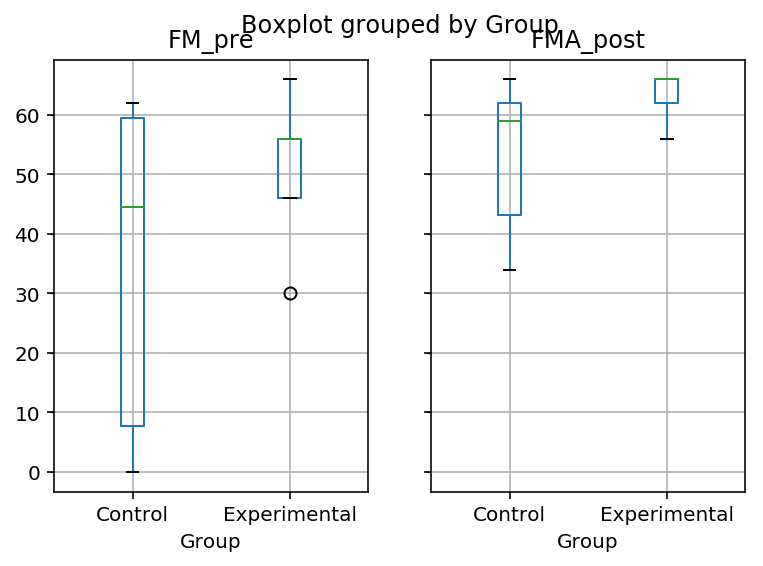

In [13]:
result.boxplot(column=['FM_pre', 'FMA_post'], by='Group')

Control              AxesSubplot(0.1,0.15;0.363636x0.75)
Experimental    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

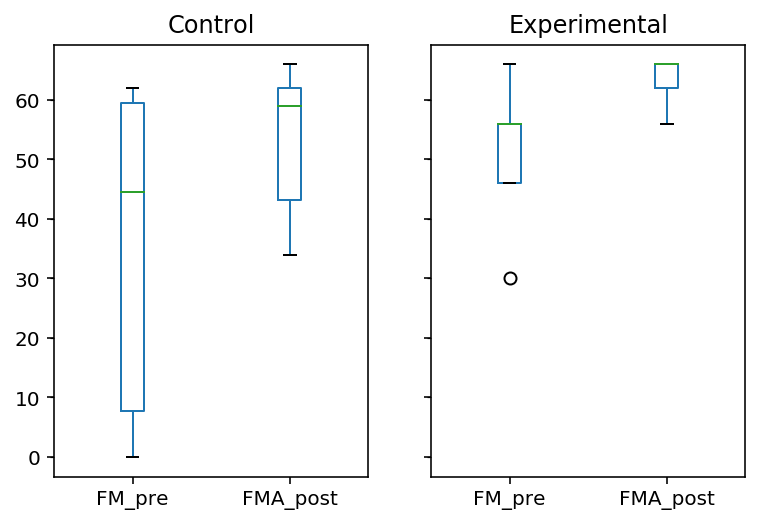

In [27]:
result.groupby('Group').boxplot(column=['FM_pre', 'FMA_post'], grid=False)

In [60]:
result.iloc[:,:12].T.diff().T

,FM_pre,FMA_post,SP_pre,SP_post,HF_pre,HF_post,BI_pre,BI_post,MMSE_pre,MMSE_post,MOCA_pre,MOCA_post
Subject,,,,,,,,,,,,
2,NaN,20.0,-51.0,-15.0,20.0,12.0,-18.0,6.0,7.0,2.0,-18.0,4.0
3,NaN,0.0,-56.0,0.0,32.0,0.0,-12.0,0.0,4.0,2.0,-6.0,2.0
4,NaN,6.0,-62.0,0.0,32.0,0.0,-12.0,0.0,4.0,2.0,-11.0,5.0
5,NaN,0.0,-66.0,0.0,32.0,0.0,-12.0,0.0,3.0,7.0,-5.0,-2.0
6,NaN,36.0,-66.0,0.0,14.0,18.0,-22.0,10.0,1.0,-1.0,-5.0,0.0
7,NaN,25.0,-56.0,0.0,22.0,5.0,-16.0,2.0,1.0,2.0,-6.0,2.0
8,NaN,34.0,-34.0,0.0,8.0,8.0,-2.0,2.0,-3.0,2.0,-2.0,2.0
9,NaN,4.0,-62.0,0.0,27.0,5.0,-16.0,4.0,5.0,2.0,-10.0,3.0
10,NaN,2.0,-62.0,0.0,26.0,3.0,-22.0,8.0,13.0,1.0,-8.0,4.0


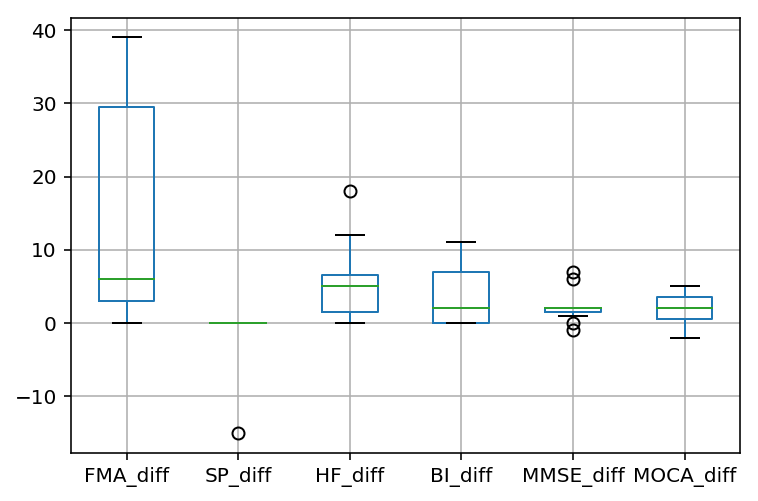

In [62]:
result.iloc[:, 13:].boxplot()

In [3]:
result = pd.read_csv('evaluation-CM.csv', index_col='Subject')
result['Group'] = result.index.map(lambda s: 'Experimental' if s <= 5  else 'Control')
result

,FM_pre,FMA_post,SP_pre,SP_post,HF_pre,HF_post,BI_pre,BI_post,MOCA_pre,MOCA_post,Group
Subject,,,,,,,,,,,
1,0,2,0,0,2,2,12,14,14,19,Experimental
2,21,27,7,6,2,3,18,19,24,26,Experimental
3,44,58,4,-1,23,25,18,20,12,15,Experimental
4,12,64,7,-1,4,31,10,20,3,9,Experimental
5,6,11,1,3,2,2,7,14,8,9,Experimental
6,40,62,5,-1,24,32,16,19,22,22,Control
7,44,55,6,-1,23,26,16,20,9,9,Control
8,55,63,8,-1,22,30,13,20,17,23,Control
9,9,9,7,6,2,2,11,12,22,22,Control


In [4]:
result.groupby('Group').median()

,FM_pre,FMA_post,SP_pre,SP_post,HF_pre,HF_post,BI_pre,BI_post,MOCA_pre,MOCA_post
Group,,,,,,,,,,
Control,40,55,6,-1,22,26,13,19,17,22
Experimental,12,27,4,0,2,3,12,19,12,15


In [5]:
result.groupby('Group').quantile(.75) - result.groupby('Group').quantile(.25)

0.75,BI_post,BI_pre,FMA_post,FM_pre,HF_post,HF_pre,MOCA_post,MOCA_pre,SP_post,SP_pre
Group,,,,,,,,,,
Control,8.0,5.0,53.0,35.0,28.0,21.0,10.0,13.0,4.0,2.0
Experimental,6.0,8.0,47.0,15.0,23.0,2.0,10.0,6.0,4.0,6.0


In [6]:
result[result.Group.str.contains('Exp')].describe()

,FM_pre,FMA_post,SP_pre,SP_post,HF_pre,HF_post,BI_pre,BI_post,MOCA_pre,MOCA_post
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,16.600000,32.400000,3.800000,1.40000,6.600000,12.60000,13.000000,17.400000,12.200000,15.600000
std,17.169741,27.682124,3.271085,3.04959,9.208692,14.22322,4.898979,3.130495,7.823043,7.197222
min,0.000000,2.000000,0.000000,-1.00000,2.000000,2.00000,7.000000,14.000000,3.000000,9.000000
25%,6.000000,11.000000,1.000000,-1.00000,2.000000,2.00000,10.000000,14.000000,8.000000,9.000000
50%,12.000000,27.000000,4.000000,0.00000,2.000000,3.00000,12.000000,19.000000,12.000000,15.000000
75%,21.000000,58.000000,7.000000,3.00000,4.000000,25.00000,18.000000,20.000000,14.000000,19.000000
max,44.000000,64.000000,7.000000,6.00000,23.000000,31.00000,18.000000,20.000000,24.000000,26.000000


In [7]:
result[result.Group.str.contains('Con')].describe()

,FM_pre,FMA_post,SP_pre,SP_post,HF_pre,HF_post,BI_pre,BI_post,MOCA_pre,MOCA_post
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,30.400000,39.400000,5.800000,1.200000,14.600000,18.400000,12.200000,16.000000,15.800000,17.600000
std,22.567676,28.377808,1.923538,3.193744,11.523888,15.126136,4.549725,5.147815,6.534524,6.580274
min,4.000000,8.000000,3.000000,-1.000000,2.000000,2.000000,5.000000,9.000000,9.000000,9.000000
25%,9.000000,9.000000,5.000000,-1.000000,2.000000,2.000000,11.000000,12.000000,9.000000,12.000000
50%,40.000000,55.000000,6.000000,-1.000000,22.000000,26.000000,13.000000,19.000000,17.000000,22.000000
75%,44.000000,62.000000,7.000000,3.000000,23.000000,30.000000,16.000000,20.000000,22.000000,22.000000
max,55.000000,63.000000,8.000000,6.000000,24.000000,32.000000,16.000000,20.000000,22.000000,23.000000


In [8]:
pre = ['FM_pre', 'SP_pre', 'HF_pre', 'BI_pre', 'MOCA_pre']
post = ['FMA_post', 'SP_post', 'HF_post', 'BI_post', 'MOCA_post']
diff = ['FMA_diff', 'SP_diff', 'HF_diff', 'BI_diff', 'MOCA_diff']

In [9]:
for i in range(len(pre)):
    r = stats.wilcoxon(result[result.Group.str.contains('Exp')][pre[i]],
                       result[result.Group.str.contains('Exp')][post[i]])
    print('pre', pre[i], 'post', post[i], ':\n', r, '\n')

pre FM_pre post FMA_post :
 WilcoxonResult(statistic=0.0, pvalue=0.043114446783075355) 

pre SP_pre post SP_post :
 WilcoxonResult(statistic=2.0, pvalue=0.27332167829229814) 

pre HF_pre post HF_post :
 WilcoxonResult(statistic=0.0, pvalue=0.10880943004054568) 

pre BI_pre post BI_post :
 WilcoxonResult(statistic=0.0, pvalue=0.04216819709715596) 

pre MOCA_pre post MOCA_post :
 WilcoxonResult(statistic=0.0, pvalue=0.043114446783075355) 



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [10]:
for i in range(len(pre)):
    r = stats.wilcoxon(result[result.Group.str.contains('Con')][pre[i]],
                       result[result.Group.str.contains('Con')][post[i]])
    print('pre', pre[i], 'post', post[i], ':\n', r, '\n')

pre FM_pre post FMA_post :
 WilcoxonResult(statistic=0.0, pvalue=0.06788915486182899) 

pre SP_pre post SP_post :
 WilcoxonResult(statistic=0.0, pvalue=0.06788915486182899) 

pre HF_pre post HF_post :
 WilcoxonResult(statistic=0.0, pvalue=0.10247043485974937) 

pre BI_pre post BI_post :
 WilcoxonResult(statistic=0.0, pvalue=0.04216819709715596) 

pre MOCA_pre post MOCA_post :
 WilcoxonResult(statistic=0.0, pvalue=0.17971249487899976) 



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [19]:
for i in range(len(pre)):
    result[diff[i]] = result[post[i]]-result[pre[i]]
result

,FM_pre,FMA_post,SP_pre,SP_post,HF_pre,HF_post,BI_pre,BI_post,MOCA_pre,MOCA_post,Group,FMA_diff,SP_diff,HF_diff,BI_diff,MOCA_diff
Subject,,,,,,,,,,,,,,,,
1,0,2,0,0,2,2,12,14,14,19,Experimental,2,0,0,2,5
2,21,27,7,6,2,3,18,19,24,26,Experimental,6,-1,1,1,2
3,44,58,4,-1,23,25,18,20,12,15,Experimental,14,-5,2,2,3
4,12,64,7,-1,4,31,10,20,3,9,Experimental,52,-8,27,10,6
5,6,11,1,3,2,2,7,14,8,9,Experimental,5,2,0,7,1
6,40,62,5,-1,24,32,16,19,22,22,Control,22,-6,8,3,0
7,44,55,6,-1,23,26,16,20,9,9,Control,11,-7,3,4,0
8,55,63,8,-1,22,30,13,20,17,23,Control,8,-9,8,7,6
9,9,9,7,6,2,2,11,12,22,22,Control,0,-1,0,1,0


In [20]:
result["SP_diff"] *= -1
result

,FM_pre,FMA_post,SP_pre,SP_post,HF_pre,HF_post,BI_pre,BI_post,MOCA_pre,MOCA_post,Group,FMA_diff,SP_diff,HF_diff,BI_diff,MOCA_diff
Subject,,,,,,,,,,,,,,,,
1,0,2,0,0,2,2,12,14,14,19,Experimental,2,0,0,2,5
2,21,27,7,6,2,3,18,19,24,26,Experimental,6,1,1,1,2
3,44,58,4,-1,23,25,18,20,12,15,Experimental,14,5,2,2,3
4,12,64,7,-1,4,31,10,20,3,9,Experimental,52,8,27,10,6
5,6,11,1,3,2,2,7,14,8,9,Experimental,5,-2,0,7,1
6,40,62,5,-1,24,32,16,19,22,22,Control,22,6,8,3,0
7,44,55,6,-1,23,26,16,20,9,9,Control,11,7,3,4,0
8,55,63,8,-1,22,30,13,20,17,23,Control,8,9,8,7,6
9,9,9,7,6,2,2,11,12,22,22,Control,0,1,0,1,0


In [21]:
for i in range(len(pre)):
    r = stats.mannwhitneyu(result[result.Group.str.contains('Con')][diff[i]],
                       result[result.Group.str.contains('Exp')][diff[i]])
    print('diff', diff[i], ':\n', r, '\n')

diff FMA_diff :
 MannwhitneyuResult(statistic=11.0, pvalue=0.41726581135546437) 

diff SP_diff :
 MannwhitneyuResult(statistic=8.0, pvalue=0.20026268008863135) 

diff HF_diff :
 MannwhitneyuResult(statistic=11.0, pvalue=0.4144061871232254) 

diff BI_diff :
 MannwhitneyuResult(statistic=12.0, pvalue=0.5) 

diff MOCA_diff :
 MannwhitneyuResult(statistic=7.0, pvalue=0.14366653483574965) 



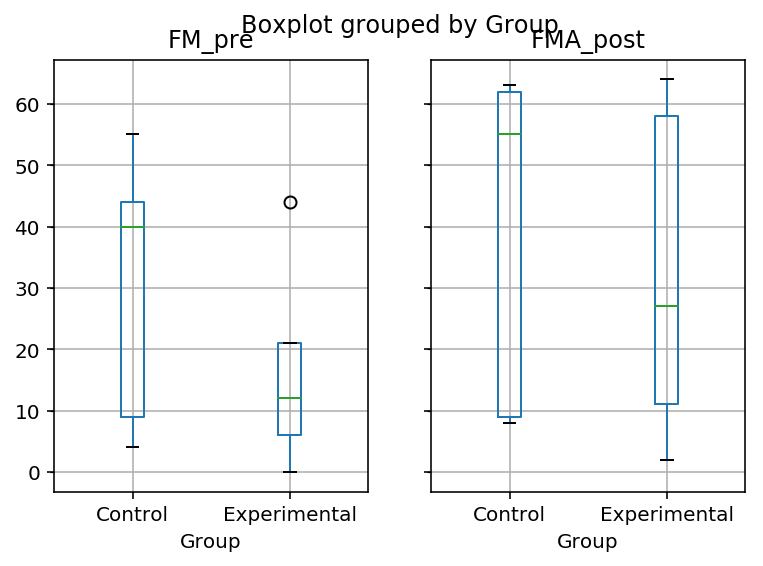

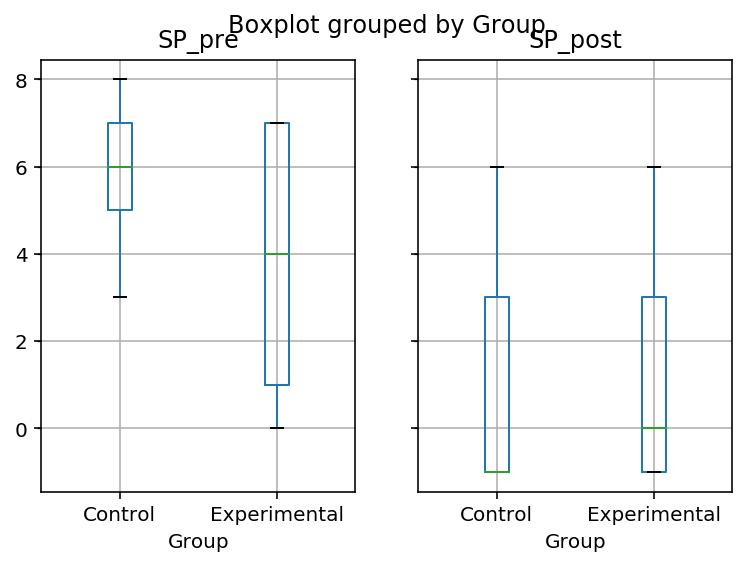

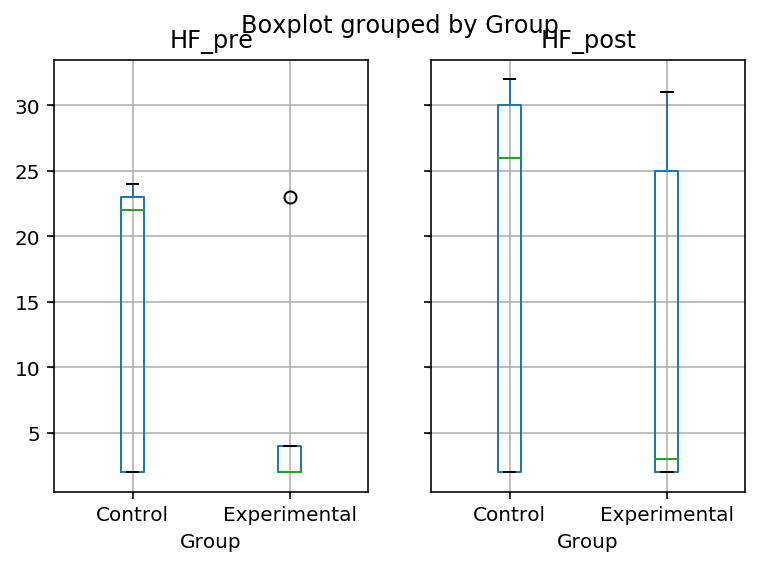

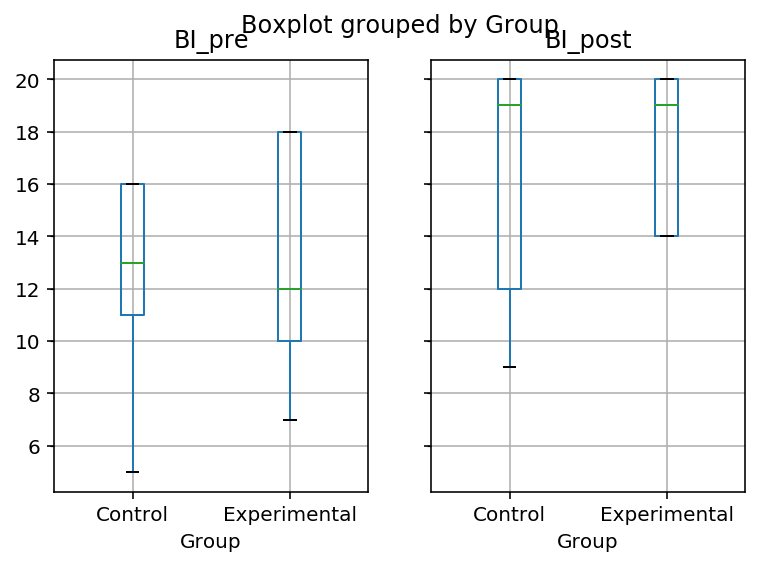

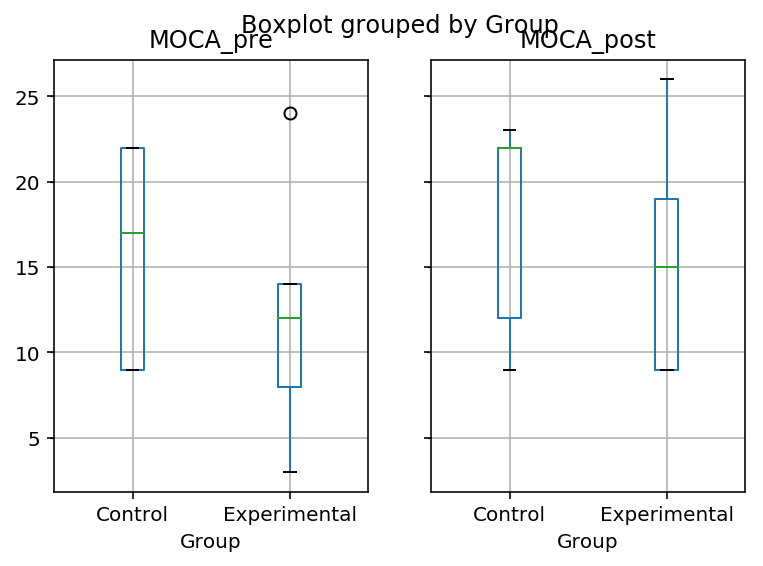

In [15]:
for i in range(len(pre)):
    result.boxplot(column=[pre[i], post[i]], by='Group')

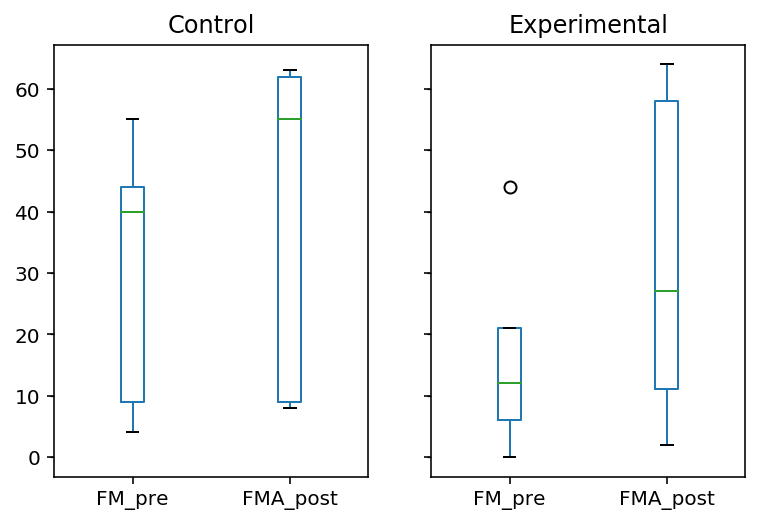

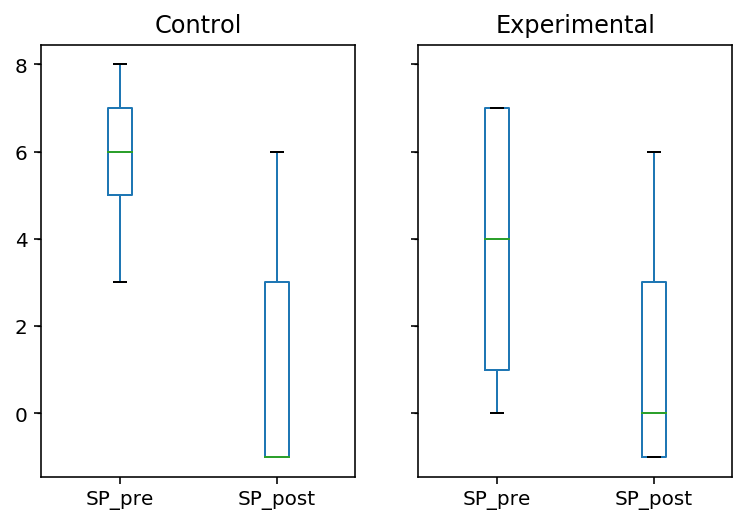

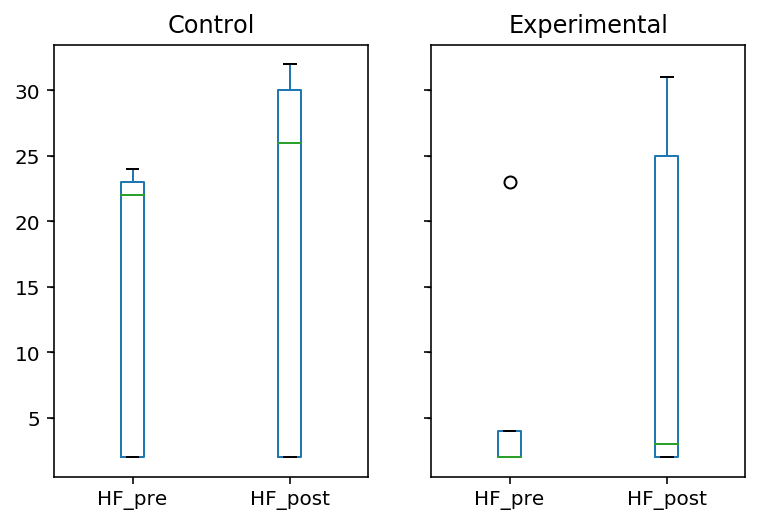

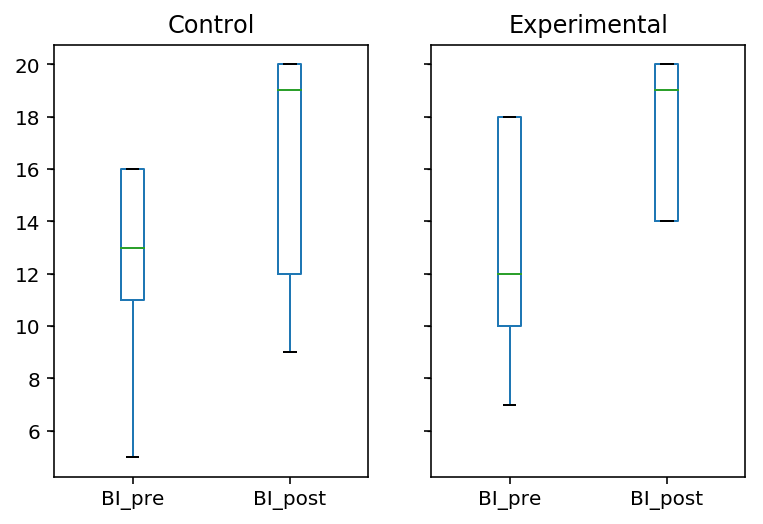

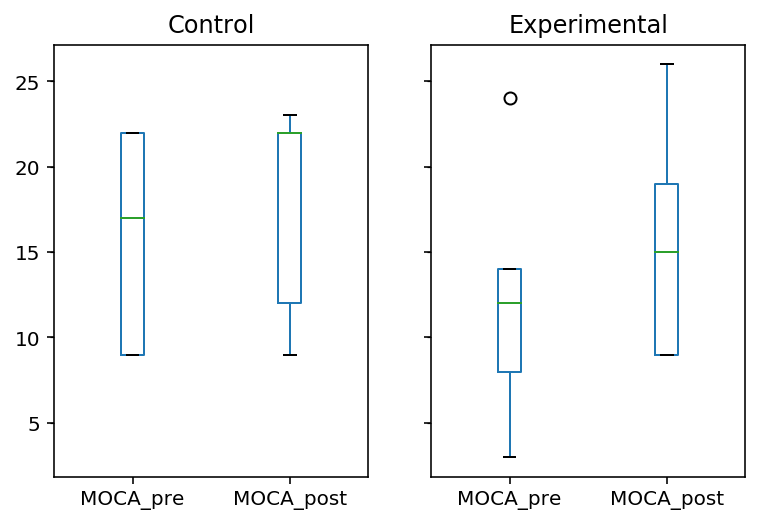

In [16]:
for i in range(len(pre)):
    result.groupby('Group').boxplot(column=[pre[i], post[i]], grid=False)